In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
# from sklearn.preprocessing import normalize
# import scipy.cluster.hierarchy as shc
# from sklearn.cluster import AgglomerativeClustering

In [16]:
# read in dataset and select columns

l = pd.read_csv('labelled.csv')
u = pd.read_csv('unlabelled.csv')

/Users/yeeeeehan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (62,63,64,80,95,97) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/yeeeeehan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5,32,34,54,55,56,62,63,64,77,80,95,97,115,116,122) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
labelled = l.set_index('eventid')
unlabelled = u.set_index('eventid')

In [18]:
# Distribution of labelled and unlabelled rows by year 

print(f"Number of rows in labelled: {labelled.shape[0]}")
print(f"Number of rows in unlabelled: {unlabelled.shape[0]}")
print(f"# of rows in labelled as a % of # of rows in unlabelled: {round(labelled.shape[0]/unlabelled.shape[0] * 100, 2)}%\n")

year_distribution = labelled["iyear"].value_counts().to_frame().join(unlabelled["iyear"].value_counts(), lsuffix = "_left").sort_index()
year_distribution.columns = ['labelled_year_count','unlabelled_year_count']
year_distribution['%_of_unlabelled'] = round(year_distribution['labelled_year_count'] / year_distribution['unlabelled_year_count'] * 100, 2)
print(f"Minimum value of %_of_unlabelled: {year_distribution['%_of_unlabelled'].min()}%")
print(f"Minimum value of %_of_unlabelled: {year_distribution['%_of_unlabelled'].max()}%")
year_distribution

Number of rows in labelled: 28139
Number of rows in unlabelled: 163325
# of rows in labelled as a % of # of rows in unlabelled: 17.23%

Minimum value of %_of_unlabelled: 8.7%
Minimum value of %_of_unlabelled: 34.51%


,labelled_year_count,unlabelled_year_count,%_of_unlabelled
1970,130,521,24.95
1971,56,415,13.49
1972,46,522,8.81
1973,84,389,21.59
1974,70,511,13.70
1975,64,676,9.47
1976,84,839,10.01
1977,147,1172,12.54
1978,289,1237,23.36
1979,478,2184,21.89


In [19]:
# Introduce nkillwound column

labelled['nkillwound'] = labelled['nkill'] + labelled['nwound']
unlabelled['nkillwound'] = unlabelled['nkill'] + unlabelled['nwound']

In [20]:
# Specifying columns to perform ML on

cols_for_learning_nperps = ['region','nperps','attacktype1','targtype1','weaptype1', 'cluster']
cols_for_learning_nkillwound = ['region','nkillwound','attacktype1','targtype1','weaptype1', 'cluster']


# extra_cols = ['extended', 'success', 'suicide', #'property'
# ]

### Nperps

In [21]:
# Total
print('Total number of unlabelled rows:')
print(unlabelled.shape[0])

# Valid nperps
print('\nNumber of unlabelled rows with valid nperps')
print(unlabelled[(unlabelled["nperps"].notnull()) &  (unlabelled["nperps"]!= -99.0)].shape[0])

# Introducing unlabelled_nperps
unlabelled_nperps = unlabelled[(unlabelled["nperps"].notnull()) &  (unlabelled["nperps"]!= -99.0)]
unlabelled_nperps.head()

Total number of unlabelled rows:
163325

Number of unlabelled rows with valid nperps
1940


,Unnamed: 0,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,cluster,nkillwound
eventid,,,,,,,,,,,,,,,,,,,,,
197002100001,59,1970,2,10,NaN,0,NaN,362,West Germany (FRG),8,...,NaN,NaN,PGIS,0,0,1,1,NaN,NaN,NaN
197007310001,440,1970,7,31,NaN,1,8/6/1970,218,Uruguay,3,...,NaN,NaN,PGIS,0,1,1,1,NaN,NaN,NaN
197008090001,456,1970,8,9,NaN,0,NaN,11,Argentina,3,...,NaN,NaN,PGIS,0,1,1,1,NaN,NaN,NaN
197009120001,513,1970,9,12,NaN,0,NaN,11,Argentina,3,...,NaN,NaN,PGIS,-9,-9,0,-9,NaN,NaN,NaN
197011210002,611,1970,11,21,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,PGIS,0,0,0,0,NaN,NaN,NaN


In [22]:
# Convert all fields to int from float 
labelled_nperps = labelled[cols_for_learning_nperps].astype('int32')
unlabelled_nperps = unlabelled_nperps[cols_for_learning_nperps[:-1]].astype('int32')

In [23]:
####Model building

import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils


from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [24]:
percentage_split = 0.8
# max_words = 1000
batch_size = 10000
epochs = 600

labelled_nperps = labelled_nperps.sample(frac=1) # Shuffle labelled set

columns = labelled_nperps[['region','attacktype1','targtype1','weaptype1']].to_numpy()
clusters = labelled_nperps['cluster'].to_numpy()

num_classes = np.max(clusters) - np.min(clusters) + 1
clusters = utils.to_categorical(clusters, num_classes)

train_size = int(len(labelled_nperps) * percentage_split) 

x_train = columns[:train_size]
y_train = clusters[:train_size]

x_eval = columns[train_size:]
y_eval = clusters[train_size:]

Epoch 1/600
2/2 [==============================] - 0s 109ms/step - loss: 1.8734 - accuracy: 0.2154 - val_loss: 1.3790 - val_accuracy: 0.3048
Epoch 2/600
2/2 [==============================] - 0s 46ms/step - loss: 1.6012 - accuracy: 0.2873 - val_loss: 1.3753 - val_accuracy: 0.3857
Epoch 3/600
2/2 [==============================] - 0s 56ms/step - loss: 1.5939 - accuracy: 0.3260 - val_loss: 1.3991 - val_accuracy: 0.4272
Epoch 4/600
2/2 [==============================] - 0s 56ms/step - loss: 1.5906 - accuracy: 0.3455 - val_loss: 1.3643 - val_accuracy: 0.4410
Epoch 5/600
2/2 [==============================] - 0s 53ms/step - loss: 1.5468 - accuracy: 0.3579 - val_loss: 1.3091 - val_accuracy: 0.4355
Epoch 6/600
2/2 [==============================] - 0s 112ms/step - loss: 1.4939 - accuracy: 0.3633 - val_loss: 1.2701 - val_accuracy: 0.4355
Epoch 7/600
2/2 [==============================] - 0s 123ms/step - loss: 1.4489 - accuracy: 0.3733 - val_loss: 1.2509 - val_accuracy: 0.4299
Epoch 8/600
2/2 [

2/2 [==============================] - 0s 62ms/step - loss: 1.1910 - accuracy: 0.4920 - val_loss: 1.1676 - val_accuracy: 0.5026
Epoch 60/600
2/2 [==============================] - 0s 47ms/step - loss: 1.1909 - accuracy: 0.4947 - val_loss: 1.1667 - val_accuracy: 0.5026
Epoch 61/600
2/2 [==============================] - 0s 58ms/step - loss: 1.1927 - accuracy: 0.4946 - val_loss: 1.1658 - val_accuracy: 0.5026
Epoch 62/600
2/2 [==============================] - 0s 43ms/step - loss: 1.1906 - accuracy: 0.4964 - val_loss: 1.1650 - val_accuracy: 0.5026
Epoch 63/600
2/2 [==============================] - 0s 41ms/step - loss: 1.1884 - accuracy: 0.4947 - val_loss: 1.1643 - val_accuracy: 0.5022
Epoch 64/600
2/2 [==============================] - 0s 48ms/step - loss: 1.1901 - accuracy: 0.4995 - val_loss: 1.1636 - val_accuracy: 0.5022
Epoch 65/600
2/2 [==============================] - 0s 43ms/step - loss: 1.1861 - accuracy: 0.4980 - val_loss: 1.1629 - val_accuracy: 0.5024
Epoch 66/600
2/2 [========

2/2 [==============================] - 0s 57ms/step - loss: 1.1482 - accuracy: 0.5159 - val_loss: 1.1345 - val_accuracy: 0.5104
Epoch 118/600
2/2 [==============================] - 0s 41ms/step - loss: 1.1507 - accuracy: 0.5145 - val_loss: 1.1342 - val_accuracy: 0.5085
Epoch 119/600
2/2 [==============================] - 0s 42ms/step - loss: 1.1482 - accuracy: 0.5115 - val_loss: 1.1337 - val_accuracy: 0.5099
Epoch 120/600
2/2 [==============================] - 0s 40ms/step - loss: 1.1458 - accuracy: 0.5160 - val_loss: 1.1333 - val_accuracy: 0.5111
Epoch 121/600
2/2 [==============================] - 0s 50ms/step - loss: 1.1491 - accuracy: 0.5127 - val_loss: 1.1332 - val_accuracy: 0.5106
Epoch 122/600
2/2 [==============================] - 0s 40ms/step - loss: 1.1475 - accuracy: 0.5137 - val_loss: 1.1330 - val_accuracy: 0.5040
Epoch 123/600
2/2 [==============================] - 0s 42ms/step - loss: 1.1481 - accuracy: 0.5143 - val_loss: 1.1324 - val_accuracy: 0.5083
Epoch 124/600
2/2 [=

Epoch 175/600
2/2 [==============================] - 0s 45ms/step - loss: 1.1305 - accuracy: 0.5229 - val_loss: 1.1200 - val_accuracy: 0.5107
Epoch 176/600
2/2 [==============================] - 0s 44ms/step - loss: 1.1323 - accuracy: 0.5221 - val_loss: 1.1197 - val_accuracy: 0.5133
Epoch 177/600
2/2 [==============================] - 0s 40ms/step - loss: 1.1349 - accuracy: 0.5211 - val_loss: 1.1198 - val_accuracy: 0.5126
Epoch 178/600
2/2 [==============================] - 0s 40ms/step - loss: 1.1333 - accuracy: 0.5209 - val_loss: 1.1192 - val_accuracy: 0.5127
Epoch 179/600
2/2 [==============================] - 0s 53ms/step - loss: 1.1301 - accuracy: 0.5227 - val_loss: 1.1188 - val_accuracy: 0.5154
Epoch 180/600
2/2 [==============================] - 0s 46ms/step - loss: 1.1339 - accuracy: 0.5217 - val_loss: 1.1188 - val_accuracy: 0.5126
Epoch 181/600
2/2 [==============================] - 0s 55ms/step - loss: 1.1338 - accuracy: 0.5187 - val_loss: 1.1189 - val_accuracy: 0.5119
Epoch 

Epoch 233/600
2/2 [==============================] - 0s 48ms/step - loss: 1.1256 - accuracy: 0.5259 - val_loss: 1.1097 - val_accuracy: 0.5173
Epoch 234/600
2/2 [==============================] - 0s 41ms/step - loss: 1.1216 - accuracy: 0.5269 - val_loss: 1.1096 - val_accuracy: 0.5221
Epoch 235/600
2/2 [==============================] - 0s 57ms/step - loss: 1.1213 - accuracy: 0.5314 - val_loss: 1.1096 - val_accuracy: 0.5170
Epoch 236/600
2/2 [==============================] - 0s 54ms/step - loss: 1.1226 - accuracy: 0.5251 - val_loss: 1.1097 - val_accuracy: 0.5185
Epoch 237/600
2/2 [==============================] - 0s 53ms/step - loss: 1.1184 - accuracy: 0.5291 - val_loss: 1.1091 - val_accuracy: 0.5178
Epoch 238/600
2/2 [==============================] - 0s 49ms/step - loss: 1.1231 - accuracy: 0.5277 - val_loss: 1.1086 - val_accuracy: 0.5317
Epoch 239/600
2/2 [==============================] - 0s 47ms/step - loss: 1.1240 - accuracy: 0.5285 - val_loss: 1.1087 - val_accuracy: 0.5182
Epoch 

Epoch 291/600
2/2 [==============================] - 0s 47ms/step - loss: 1.1145 - accuracy: 0.5304 - val_loss: 1.1018 - val_accuracy: 0.5308
Epoch 292/600
2/2 [==============================] - 0s 62ms/step - loss: 1.1151 - accuracy: 0.5307 - val_loss: 1.1015 - val_accuracy: 0.5341
Epoch 293/600
2/2 [==============================] - 0s 61ms/step - loss: 1.1139 - accuracy: 0.5308 - val_loss: 1.1014 - val_accuracy: 0.5357
Epoch 294/600
2/2 [==============================] - 0s 54ms/step - loss: 1.1149 - accuracy: 0.5298 - val_loss: 1.1013 - val_accuracy: 0.5349
Epoch 295/600
2/2 [==============================] - 0s 42ms/step - loss: 1.1117 - accuracy: 0.5348 - val_loss: 1.1014 - val_accuracy: 0.5335
Epoch 296/600
2/2 [==============================] - 0s 48ms/step - loss: 1.1121 - accuracy: 0.5337 - val_loss: 1.1014 - val_accuracy: 0.5336
Epoch 297/600
2/2 [==============================] - 0s 44ms/step - loss: 1.1148 - accuracy: 0.5327 - val_loss: 1.1013 - val_accuracy: 0.5339
Epoch 

Epoch 349/600
2/2 [==============================] - 0s 47ms/step - loss: 1.1108 - accuracy: 0.5327 - val_loss: 1.0971 - val_accuracy: 0.5335
Epoch 350/600
2/2 [==============================] - 0s 41ms/step - loss: 1.1108 - accuracy: 0.5375 - val_loss: 1.0966 - val_accuracy: 0.5326
Epoch 351/600
2/2 [==============================] - 0s 48ms/step - loss: 1.1112 - accuracy: 0.5309 - val_loss: 1.0963 - val_accuracy: 0.5349
Epoch 352/600
2/2 [==============================] - 0s 40ms/step - loss: 1.1089 - accuracy: 0.5355 - val_loss: 1.0964 - val_accuracy: 0.5363
Epoch 353/600
2/2 [==============================] - 0s 44ms/step - loss: 1.1100 - accuracy: 0.5331 - val_loss: 1.0962 - val_accuracy: 0.5360
Epoch 354/600
2/2 [==============================] - 0s 44ms/step - loss: 1.1081 - accuracy: 0.5324 - val_loss: 1.0963 - val_accuracy: 0.5395
Epoch 355/600
2/2 [==============================] - 0s 50ms/step - loss: 1.1052 - accuracy: 0.5342 - val_loss: 1.0962 - val_accuracy: 0.5365
Epoch 

Epoch 407/600
2/2 [==============================] - 0s 52ms/step - loss: 1.1074 - accuracy: 0.5355 - val_loss: 1.0921 - val_accuracy: 0.5349
Epoch 408/600
2/2 [==============================] - 0s 104ms/step - loss: 1.1052 - accuracy: 0.5356 - val_loss: 1.0926 - val_accuracy: 0.5355
Epoch 409/600
2/2 [==============================] - 0s 74ms/step - loss: 1.1026 - accuracy: 0.5379 - val_loss: 1.0927 - val_accuracy: 0.5388
Epoch 410/600
2/2 [==============================] - 0s 50ms/step - loss: 1.1072 - accuracy: 0.5394 - val_loss: 1.0924 - val_accuracy: 0.5395
Epoch 411/600
2/2 [==============================] - 0s 45ms/step - loss: 1.1018 - accuracy: 0.5425 - val_loss: 1.0916 - val_accuracy: 0.5391
Epoch 412/600
2/2 [==============================] - 0s 46ms/step - loss: 1.1055 - accuracy: 0.5376 - val_loss: 1.0914 - val_accuracy: 0.5369
Epoch 413/600
2/2 [==============================] - 0s 40ms/step - loss: 1.1046 - accuracy: 0.5375 - val_loss: 1.0912 - val_accuracy: 0.5369
Epoch

Epoch 465/600
2/2 [==============================] - 0s 82ms/step - loss: 1.1032 - accuracy: 0.5380 - val_loss: 1.0882 - val_accuracy: 0.5407
Epoch 466/600
2/2 [==============================] - 0s 67ms/step - loss: 1.1006 - accuracy: 0.5381 - val_loss: 1.0882 - val_accuracy: 0.5407
Epoch 467/600
2/2 [==============================] - 0s 80ms/step - loss: 1.1017 - accuracy: 0.5382 - val_loss: 1.0881 - val_accuracy: 0.5468
Epoch 468/600
2/2 [==============================] - 0s 78ms/step - loss: 1.1037 - accuracy: 0.5392 - val_loss: 1.0885 - val_accuracy: 0.5452
Epoch 469/600
2/2 [==============================] - 0s 77ms/step - loss: 1.1010 - accuracy: 0.5397 - val_loss: 1.0892 - val_accuracy: 0.5367
Epoch 470/600
2/2 [==============================] - 0s 72ms/step - loss: 1.0991 - accuracy: 0.5381 - val_loss: 1.0891 - val_accuracy: 0.5413
Epoch 471/600
2/2 [==============================] - 0s 87ms/step - loss: 1.1016 - accuracy: 0.5417 - val_loss: 1.0887 - val_accuracy: 0.5396
Epoch 

Epoch 523/600
2/2 [==============================] - 0s 48ms/step - loss: 1.0949 - accuracy: 0.5422 - val_loss: 1.0850 - val_accuracy: 0.5444
Epoch 524/600
2/2 [==============================] - 0s 67ms/step - loss: 1.0953 - accuracy: 0.5440 - val_loss: 1.0847 - val_accuracy: 0.5466
Epoch 525/600
2/2 [==============================] - 0s 71ms/step - loss: 1.0937 - accuracy: 0.5459 - val_loss: 1.0846 - val_accuracy: 0.5472
Epoch 526/600
2/2 [==============================] - 0s 59ms/step - loss: 1.0975 - accuracy: 0.5413 - val_loss: 1.0846 - val_accuracy: 0.5439
Epoch 527/600
2/2 [==============================] - 0s 67ms/step - loss: 1.0979 - accuracy: 0.5412 - val_loss: 1.0843 - val_accuracy: 0.5453
Epoch 528/600
2/2 [==============================] - 0s 51ms/step - loss: 1.0985 - accuracy: 0.5416 - val_loss: 1.0842 - val_accuracy: 0.5458
Epoch 529/600
2/2 [==============================] - 0s 45ms/step - loss: 1.0956 - accuracy: 0.5396 - val_loss: 1.0844 - val_accuracy: 0.5423
Epoch 

Epoch 581/600
2/2 [==============================] - 0s 40ms/step - loss: 1.0937 - accuracy: 0.5442 - val_loss: 1.0809 - val_accuracy: 0.5483
Epoch 582/600
2/2 [==============================] - 0s 43ms/step - loss: 1.0938 - accuracy: 0.5440 - val_loss: 1.0807 - val_accuracy: 0.5495
Epoch 583/600
2/2 [==============================] - 0s 46ms/step - loss: 1.0938 - accuracy: 0.5434 - val_loss: 1.0809 - val_accuracy: 0.5485
Epoch 584/600
2/2 [==============================] - 0s 54ms/step - loss: 1.0938 - accuracy: 0.5440 - val_loss: 1.0812 - val_accuracy: 0.5470
Epoch 585/600
2/2 [==============================] - 0s 39ms/step - loss: 1.0923 - accuracy: 0.5415 - val_loss: 1.0808 - val_accuracy: 0.5473
Epoch 586/600
2/2 [==============================] - 0s 57ms/step - loss: 1.0916 - accuracy: 0.5450 - val_loss: 1.0808 - val_accuracy: 0.5476
Epoch 587/600
2/2 [==============================] - 0s 41ms/step - loss: 1.0954 - accuracy: 0.5400 - val_loss: 1.0807 - val_accuracy: 0.5488
Epoch 

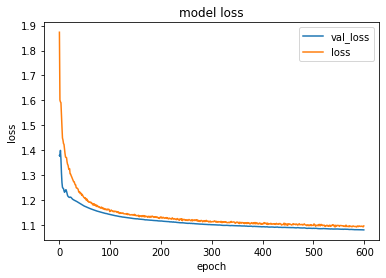

In [25]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(len(columns[0]),)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              


history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.33)

def display_training_graph(history):
    # summarize history for loss
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['val_loss', 'loss'], loc='upper right')
    plt.draw()


display_training_graph(history)

In [26]:
#Evaluation
evaluation_score = model.evaluate(x_eval, y_eval,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', evaluation_score[1])

1/1 [==============================] - 0s 1ms/step - loss: 1.0839 - accuracy: 0.5489
Test accuracy: 0.5488628149032593


### Nkillwound

In [27]:
# Total
print('Total number of unlabelled rows:')
print(unlabelled.shape[0])

# Valid nperps
print('\nNumber of unlabelled rows with valid nkillwound')
print(unlabelled[(unlabelled["nkillwound"].notnull())].shape[0])

# Introducing unlabelled_nperps
unlabelled_nkillwound = unlabelled[(unlabelled["nkillwound"].notnull())]

Total number of unlabelled rows:
163325

Number of unlabelled rows with valid nkillwound
145140


In [28]:
# Convert all fields to int from float 
labelled_nkillwound = labelled[cols_for_learning_nkillwound].astype('int32')
unlabelled_nkillwound = unlabelled_nkillwound[cols_for_learning_nkillwound[:-1]].astype('int32')

print(unlabelled_nkillwound.shape)
unlabelled_nkillwound.head()

(145140, 5)


,region,nkillwound,attacktype1,targtype1,weaptype1
eventid,,,,,
197000000001,2,1,1,14,13
197001000001,5,1,1,10,13
197001010002,1,0,2,3,5
197001020002,1,0,3,21,6
197001050001,1,0,3,4,6


In [29]:
percentage_split = 0.8
# max_words = 1000
batch_size = 10000
epochs = 600

labelled_nkillwound = labelled_nkillwound.sample(frac=1) # Shuffle labelled set

columns = labelled_nkillwound[['region','attacktype1','targtype1','weaptype1']].to_numpy()
clusters = labelled_nkillwound['cluster'].to_numpy()

num_classes = np.max(clusters) - np.min(clusters) + 1
clusters = utils.to_categorical(clusters, num_classes)

train_size = int(len(labelled_nkillwound) * percentage_split) 

x_train = columns[:train_size]
y_train = clusters[:train_size]

x_eval = columns[train_size:]
y_eval = clusters[train_size:]

Epoch 1/600
2/2 [==============================] - 0s 152ms/step - loss: 1.7611 - accuracy: 0.2645 - val_loss: 1.3503 - val_accuracy: 0.3297
Epoch 2/600
2/2 [==============================] - 0s 80ms/step - loss: 1.6154 - accuracy: 0.2930 - val_loss: 1.3683 - val_accuracy: 0.3496
Epoch 3/600
2/2 [==============================] - 0s 74ms/step - loss: 1.5952 - accuracy: 0.3212 - val_loss: 1.3355 - val_accuracy: 0.3496
Epoch 4/600
2/2 [==============================] - 0s 83ms/step - loss: 1.5509 - accuracy: 0.3364 - val_loss: 1.2773 - val_accuracy: 0.4005
Epoch 5/600
2/2 [==============================] - 0s 69ms/step - loss: 1.5002 - accuracy: 0.3405 - val_loss: 1.2564 - val_accuracy: 0.4301
Epoch 6/600
2/2 [==============================] - 0s 70ms/step - loss: 1.4792 - accuracy: 0.3440 - val_loss: 1.2598 - val_accuracy: 0.4353
Epoch 7/600
2/2 [==============================] - 0s 72ms/step - loss: 1.4642 - accuracy: 0.3538 - val_loss: 1.2518 - val_accuracy: 0.4437
Epoch 8/600
2/2 [==

2/2 [==============================] - 0s 42ms/step - loss: 1.1813 - accuracy: 0.4948 - val_loss: 1.1546 - val_accuracy: 0.5126
Epoch 60/600
2/2 [==============================] - 0s 41ms/step - loss: 1.1829 - accuracy: 0.4952 - val_loss: 1.1535 - val_accuracy: 0.5114
Epoch 61/600
2/2 [==============================] - 0s 44ms/step - loss: 1.1804 - accuracy: 0.4983 - val_loss: 1.1524 - val_accuracy: 0.5112
Epoch 62/600
2/2 [==============================] - 0s 41ms/step - loss: 1.1820 - accuracy: 0.4966 - val_loss: 1.1513 - val_accuracy: 0.5112
Epoch 63/600
2/2 [==============================] - 0s 47ms/step - loss: 1.1793 - accuracy: 0.4952 - val_loss: 1.1502 - val_accuracy: 0.5114
Epoch 64/600
2/2 [==============================] - 0s 43ms/step - loss: 1.1745 - accuracy: 0.4985 - val_loss: 1.1495 - val_accuracy: 0.5104
Epoch 65/600
2/2 [==============================] - 0s 44ms/step - loss: 1.1743 - accuracy: 0.5009 - val_loss: 1.1488 - val_accuracy: 0.5088
Epoch 66/600
2/2 [========

Epoch 117/600
2/2 [==============================] - 0s 46ms/step - loss: 1.1410 - accuracy: 0.5178 - val_loss: 1.1226 - val_accuracy: 0.5170
Epoch 118/600
2/2 [==============================] - 0s 42ms/step - loss: 1.1426 - accuracy: 0.5137 - val_loss: 1.1220 - val_accuracy: 0.5186
Epoch 119/600
2/2 [==============================] - 0s 44ms/step - loss: 1.1421 - accuracy: 0.5156 - val_loss: 1.1219 - val_accuracy: 0.5186
Epoch 120/600
2/2 [==============================] - 0s 60ms/step - loss: 1.1426 - accuracy: 0.5160 - val_loss: 1.1222 - val_accuracy: 0.5192
Epoch 121/600
2/2 [==============================] - 0s 46ms/step - loss: 1.1441 - accuracy: 0.5143 - val_loss: 1.1220 - val_accuracy: 0.5161
Epoch 122/600
2/2 [==============================] - 0s 40ms/step - loss: 1.1434 - accuracy: 0.5167 - val_loss: 1.1215 - val_accuracy: 0.5172
Epoch 123/600
2/2 [==============================] - 0s 42ms/step - loss: 1.1401 - accuracy: 0.5180 - val_loss: 1.1209 - val_accuracy: 0.5173
Epoch 

Epoch 175/600
2/2 [==============================] - 0s 42ms/step - loss: 1.1247 - accuracy: 0.5224 - val_loss: 1.1074 - val_accuracy: 0.5256
Epoch 176/600
2/2 [==============================] - 0s 46ms/step - loss: 1.1283 - accuracy: 0.5232 - val_loss: 1.1076 - val_accuracy: 0.5250
Epoch 177/600
2/2 [==============================] - 0s 55ms/step - loss: 1.1295 - accuracy: 0.5243 - val_loss: 1.1073 - val_accuracy: 0.5265
Epoch 178/600
2/2 [==============================] - 0s 70ms/step - loss: 1.1278 - accuracy: 0.5239 - val_loss: 1.1069 - val_accuracy: 0.5256
Epoch 179/600
2/2 [==============================] - 0s 43ms/step - loss: 1.1222 - accuracy: 0.5233 - val_loss: 1.1070 - val_accuracy: 0.5243
Epoch 180/600
2/2 [==============================] - 0s 50ms/step - loss: 1.1247 - accuracy: 0.5273 - val_loss: 1.1073 - val_accuracy: 0.5238
Epoch 181/600
2/2 [==============================] - 0s 52ms/step - loss: 1.1272 - accuracy: 0.5255 - val_loss: 1.1067 - val_accuracy: 0.5236
Epoch 

Epoch 233/600
2/2 [==============================] - 0s 112ms/step - loss: 1.1153 - accuracy: 0.5293 - val_loss: 1.0980 - val_accuracy: 0.5400
Epoch 234/600
2/2 [==============================] - 0s 77ms/step - loss: 1.1158 - accuracy: 0.5286 - val_loss: 1.0976 - val_accuracy: 0.5375
Epoch 235/600
2/2 [==============================] - 0s 66ms/step - loss: 1.1158 - accuracy: 0.5327 - val_loss: 1.0973 - val_accuracy: 0.5294
Epoch 236/600
2/2 [==============================] - 0s 58ms/step - loss: 1.1197 - accuracy: 0.5294 - val_loss: 1.0974 - val_accuracy: 0.5306
Epoch 237/600
2/2 [==============================] - 0s 76ms/step - loss: 1.1153 - accuracy: 0.5302 - val_loss: 1.0972 - val_accuracy: 0.5308
Epoch 238/600
2/2 [==============================] - 0s 88ms/step - loss: 1.1156 - accuracy: 0.5288 - val_loss: 1.0969 - val_accuracy: 0.5395
Epoch 239/600
2/2 [==============================] - 0s 69ms/step - loss: 1.1181 - accuracy: 0.5307 - val_loss: 1.0967 - val_accuracy: 0.5402
Epoch

Epoch 291/600
2/2 [==============================] - 0s 47ms/step - loss: 1.1125 - accuracy: 0.5344 - val_loss: 1.0912 - val_accuracy: 0.5400
Epoch 292/600
2/2 [==============================] - 0s 51ms/step - loss: 1.1095 - accuracy: 0.5322 - val_loss: 1.0914 - val_accuracy: 0.5422
Epoch 293/600
2/2 [==============================] - 0s 45ms/step - loss: 1.1079 - accuracy: 0.5360 - val_loss: 1.0913 - val_accuracy: 0.5422
Epoch 294/600
2/2 [==============================] - 0s 44ms/step - loss: 1.1104 - accuracy: 0.5312 - val_loss: 1.0909 - val_accuracy: 0.5410
Epoch 295/600
2/2 [==============================] - 0s 48ms/step - loss: 1.1076 - accuracy: 0.5389 - val_loss: 1.0910 - val_accuracy: 0.5422
Epoch 296/600
2/2 [==============================] - 0s 44ms/step - loss: 1.1085 - accuracy: 0.5334 - val_loss: 1.0909 - val_accuracy: 0.5417
Epoch 297/600
2/2 [==============================] - 0s 46ms/step - loss: 1.1119 - accuracy: 0.5324 - val_loss: 1.0904 - val_accuracy: 0.5289
Epoch 

Epoch 349/600
2/2 [==============================] - 0s 68ms/step - loss: 1.1045 - accuracy: 0.5424 - val_loss: 1.0856 - val_accuracy: 0.5430
Epoch 350/600
2/2 [==============================] - 0s 51ms/step - loss: 1.1063 - accuracy: 0.5347 - val_loss: 1.0855 - val_accuracy: 0.5398
Epoch 351/600
2/2 [==============================] - 0s 57ms/step - loss: 1.1048 - accuracy: 0.5381 - val_loss: 1.0862 - val_accuracy: 0.5469
Epoch 352/600
2/2 [==============================] - 0s 46ms/step - loss: 1.1052 - accuracy: 0.5381 - val_loss: 1.0864 - val_accuracy: 0.5473
Epoch 353/600
2/2 [==============================] - 0s 52ms/step - loss: 1.1065 - accuracy: 0.5310 - val_loss: 1.0860 - val_accuracy: 0.5480
Epoch 354/600
2/2 [==============================] - 0s 48ms/step - loss: 1.1074 - accuracy: 0.5355 - val_loss: 1.0857 - val_accuracy: 0.5413
Epoch 355/600
2/2 [==============================] - 0s 42ms/step - loss: 1.1046 - accuracy: 0.5404 - val_loss: 1.0855 - val_accuracy: 0.5411
Epoch 

Epoch 407/600
2/2 [==============================] - 0s 45ms/step - loss: 1.1021 - accuracy: 0.5389 - val_loss: 1.0824 - val_accuracy: 0.5481
Epoch 408/600
2/2 [==============================] - 0s 54ms/step - loss: 1.1025 - accuracy: 0.5398 - val_loss: 1.0828 - val_accuracy: 0.5516
Epoch 409/600
2/2 [==============================] - 0s 52ms/step - loss: 1.1007 - accuracy: 0.5430 - val_loss: 1.0832 - val_accuracy: 0.5522
Epoch 410/600
2/2 [==============================] - 0s 40ms/step - loss: 1.1016 - accuracy: 0.5420 - val_loss: 1.0824 - val_accuracy: 0.5456
Epoch 411/600
2/2 [==============================] - 0s 43ms/step - loss: 1.1012 - accuracy: 0.5376 - val_loss: 1.0825 - val_accuracy: 0.5446
Epoch 412/600
2/2 [==============================] - 0s 42ms/step - loss: 1.1023 - accuracy: 0.5359 - val_loss: 1.0826 - val_accuracy: 0.5495
Epoch 413/600
2/2 [==============================] - 0s 42ms/step - loss: 1.1045 - accuracy: 0.5379 - val_loss: 1.0826 - val_accuracy: 0.5481
Epoch 

Epoch 465/600
2/2 [==============================] - 0s 52ms/step - loss: 1.0968 - accuracy: 0.5427 - val_loss: 1.0794 - val_accuracy: 0.5531
Epoch 466/600
2/2 [==============================] - 0s 61ms/step - loss: 1.1007 - accuracy: 0.5420 - val_loss: 1.0793 - val_accuracy: 0.5553
Epoch 467/600
2/2 [==============================] - 0s 45ms/step - loss: 1.1013 - accuracy: 0.5421 - val_loss: 1.0792 - val_accuracy: 0.5536
Epoch 468/600
2/2 [==============================] - 0s 57ms/step - loss: 1.0979 - accuracy: 0.5439 - val_loss: 1.0798 - val_accuracy: 0.5532
Epoch 469/600
2/2 [==============================] - 0s 50ms/step - loss: 1.0996 - accuracy: 0.5434 - val_loss: 1.0796 - val_accuracy: 0.5536
Epoch 470/600
2/2 [==============================] - 0s 64ms/step - loss: 1.0985 - accuracy: 0.5425 - val_loss: 1.0792 - val_accuracy: 0.5549
Epoch 471/600
2/2 [==============================] - 0s 72ms/step - loss: 1.0974 - accuracy: 0.5403 - val_loss: 1.0794 - val_accuracy: 0.5523
Epoch 

Epoch 523/600
2/2 [==============================] - 0s 70ms/step - loss: 1.0927 - accuracy: 0.5433 - val_loss: 1.0766 - val_accuracy: 0.5555
Epoch 524/600
2/2 [==============================] - 0s 49ms/step - loss: 1.0969 - accuracy: 0.5440 - val_loss: 1.0766 - val_accuracy: 0.5515
Epoch 525/600
2/2 [==============================] - 0s 42ms/step - loss: 1.0928 - accuracy: 0.5440 - val_loss: 1.0777 - val_accuracy: 0.5546
Epoch 526/600
2/2 [==============================] - 0s 44ms/step - loss: 1.0939 - accuracy: 0.5481 - val_loss: 1.0770 - val_accuracy: 0.5544
Epoch 527/600
2/2 [==============================] - 0s 44ms/step - loss: 1.0950 - accuracy: 0.5433 - val_loss: 1.0767 - val_accuracy: 0.5530
Epoch 528/600
2/2 [==============================] - 0s 53ms/step - loss: 1.0923 - accuracy: 0.5446 - val_loss: 1.0771 - val_accuracy: 0.5540
Epoch 529/600
2/2 [==============================] - 0s 54ms/step - loss: 1.0926 - accuracy: 0.5463 - val_loss: 1.0775 - val_accuracy: 0.5538
Epoch 

Epoch 581/600
2/2 [==============================] - 0s 49ms/step - loss: 1.0892 - accuracy: 0.5471 - val_loss: 1.0742 - val_accuracy: 0.5561
Epoch 582/600
2/2 [==============================] - 0s 69ms/step - loss: 1.0917 - accuracy: 0.5440 - val_loss: 1.0743 - val_accuracy: 0.5550
Epoch 583/600
2/2 [==============================] - 0s 46ms/step - loss: 1.0885 - accuracy: 0.5487 - val_loss: 1.0742 - val_accuracy: 0.5542
Epoch 584/600
2/2 [==============================] - 0s 60ms/step - loss: 1.0938 - accuracy: 0.5465 - val_loss: 1.0741 - val_accuracy: 0.5547
Epoch 585/600
2/2 [==============================] - 0s 54ms/step - loss: 1.0907 - accuracy: 0.5474 - val_loss: 1.0742 - val_accuracy: 0.5558
Epoch 586/600
2/2 [==============================] - 0s 49ms/step - loss: 1.0917 - accuracy: 0.5505 - val_loss: 1.0743 - val_accuracy: 0.5554
Epoch 587/600
2/2 [==============================] - 0s 51ms/step - loss: 1.0956 - accuracy: 0.5422 - val_loss: 1.0742 - val_accuracy: 0.5557
Epoch 

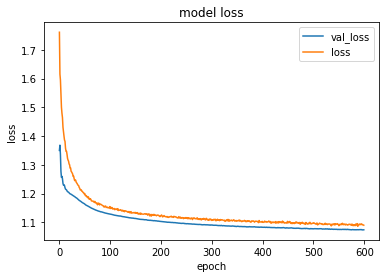

In [30]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(len(columns[0]),)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              


history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.33)

def display_training_graph(history):
    # summarize history for loss
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['val_loss', 'loss'], loc='upper right')
    plt.draw()


display_training_graph(history)